In [161]:
import pickle
from sklearn import linear_model
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as pca

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load CAV

In [162]:
path = '/Users/tyler/Desktop/dissertation/programming/tcav/cavs/striped-random500_1-mixed6-linear-0.1.pkl'

with open(path, 'rb') as f:
    data = pickle.load(f)

In [163]:
d = dict(data)
arr = d['cavs']

In [164]:
d['concepts']

['striped', 'random500_1']

In [165]:
x1 = arr[0]
x2 = arr[1]

In [166]:
17 * 17 * 768

221952

In [167]:
len(x2)

221952

In [168]:
x1.mean()

-0.009726882975522851

## Load x_train

In [53]:
source_dir = '/Users/tyler/Desktop/dissertation/programming/tcav/cavs/'
path = source_dir + 'striped-random500_0-mixed1-linear-0.1_test.pkl'

with open(path, 'rb') as f:
    data = pickle.load(f)

In [55]:
#data

In [56]:
d = dict(data)
x_train = d['x_train']
x_test = d['x_test']
y_train = d['y_train']
y_test = d['y_test']
y_pred = d['y_pred']

In [37]:
x_train.shape

(46, 352800)

In [44]:
y_pred.shape

(24,)

In [45]:
y_test

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0])

In [28]:
total_images = 50 + 35
total_images * .667

56.695

In [43]:
#46 + 24

In [29]:
x_train[1]

array([0.727363 , 0.       , 0.2912956, ..., 0.       , 0.       ,
       0.       ], dtype=float32)

In [30]:
35 * 35 * 288

352800

In [59]:
x_embedded.shape

(46, 2)

In [66]:
#x_embedded

In [62]:
#t.fit_transform()

In [151]:
t = TSNE(n_components=2, perplexity=30).fit(x_train)

In [160]:
#t.

In [82]:

x_train_embed = TSNE(n_components=2, perplexity=30).fit_transform(x_train)

x1 = np.array([a[0] for a  in x_train_embed])
x2 = np.array([a[1] for a  in x_train_embed])

color_train = ['red' if y == 0 else 'blue' for y in y_train]

x_test_embed = TSNE(n_components=2).fit_transform(x_test)

x1_test = np.array([a[0] for a  in x_test_embed])
x2_test = np.array([a[1] for a  in x_test_embed])

color_test = ['red' if y == 0 else 'blue' for y in y_test]

In [119]:
pca_instance = pca(n_components=2).fit(x_train)

In [130]:
x_train_embed.shape

(2, 46)

In [147]:
x_train_embed = np.dot(pca_instance.components_, x_train.T)

x1 = np.array([a[0] for a  in x_train_embed])
x2 = np.array([a[1] for a  in x_train_embed])

color_train = ['red' if y == 0 else 'blue' for y in y_train]

#x_test_embed = TSNE(n_components=2).fit_transform(x_test)

x1_test = np.array([a[0] for a  in x_test_embed])
x2_test = np.array([a[1] for a  in x_test_embed])

color_test = ['red' if y == 0 else 'blue' for y in y_test]

In [148]:
pca_instance.components_.shape

(2, 352800)

In [149]:
#pca_instance.fit_transform(x_train)

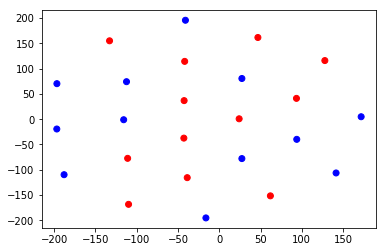

In [150]:
plt.scatter(x1_test, x2_test, color = color_test)

In [50]:
X

array([[0, 0, 0],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [52]:
#X_embedded

In [75]:
## TSNE example
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(4, 2)

## Replicate lm

In [93]:
lm = linear_model.SGDClassifier(alpha=.1)
lm.fit(x_train, y_train)

/Users/tyler/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [102]:
lm.predict(x_test)

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0])

In [103]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1])

In [104]:
#lm.coef_.shape

coef = lm.coef_

In [105]:
#bound = TSNE(n_components=2).fit_transform(coef)

In [106]:
coef

array([[ 0.03202338, -0.59330254, -0.02922003, ...,  0.17683313,
        -0.10798527, -0.10259663]])

## Decision Boundary

In [36]:
x = np.array([[-1,1],[-1,-1],[1,-1],[1,1]])
y = np.array([0,0,1,1])

In [37]:
#y

In [38]:
lm = linear_model.SGDClassifier(alpha=.1)
lm.fit(x, y)

/Users/tyler/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [43]:
#x[:, 0].min()

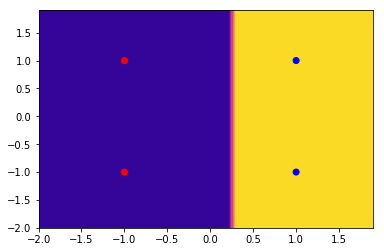

In [48]:
h = .1  # step size in the mesh
# create a mesh to plot in
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
z = lm.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap ='plasma')


x1 = np.array([a[0] for a  in x])
x2 = np.array([a[1] for a  in x])

color = ['red' if y == 0 else 'blue' for y in y]

plt.scatter(x1, x2, color = color)

In [40]:
z[0][0]

0